In [1]:
#Imports
import numpy as np 
from NNetwork import NNetwork as nn
import networkx as nx
#import utils.NNetwork as nn
import utils.ndl as ndl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics, model_selection
from tqdm import trange
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from helper_functions.helper_functions import display_graphs, display_dict_and_graph, display_graphs_dict_graph, motif_sample_display_list
from helper_functions.final_plots_display import community_box_plot

from scipy import stats
from scipy.stats import wilcoxon, median_test, kstest

In [2]:

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    #"font.size"   : 15,
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        "\\usepackage{units}",  # load additional packages
        "\\usepackage{metalogo}",
        "\\usepackage{unicode-math}",  # unicode math setup
        r"\setmathfont{xits-math.otf}",
        r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
})

# Subgraphs induced on uniformly random k-paths

In [4]:
ntwk_list = ['Caltech36', 'UCLA26', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
#ntwk_list = ['Caltech36', 'UCLA26']
sampling_alg = 'pivot'
save_folder = 'Network_dictionary/test1/'

graph_list = []
for ntwk in ntwk_list:
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    path = "Data/Networks_all_NDL/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)
    print('num nodes in G', len(G.nodes()))
    print('num edges in G', len(G.get_edges()))
    

num nodes in G 769
num edges in G 33312
num nodes in G 20467
num edges in G 1495226
num nodes in G 5000
num edges in G 250356
num nodes in G 5000
num edges in G 495000
num nodes in G 5000
num edges in G 250000
num nodes in G 3000
num edges in G 1504900


num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100


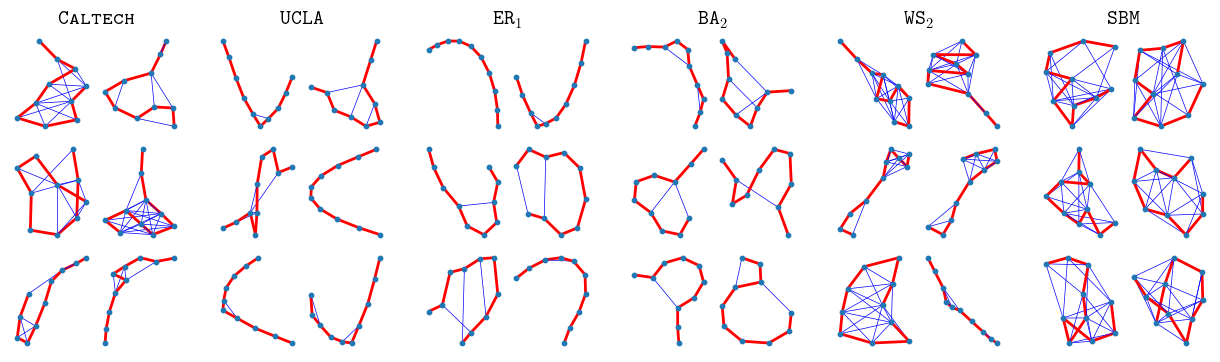

In [5]:
motif_sample_display_list(list_graphs=graph_list, k=10, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex.pdf',
                          fig_size = [15,4])

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100


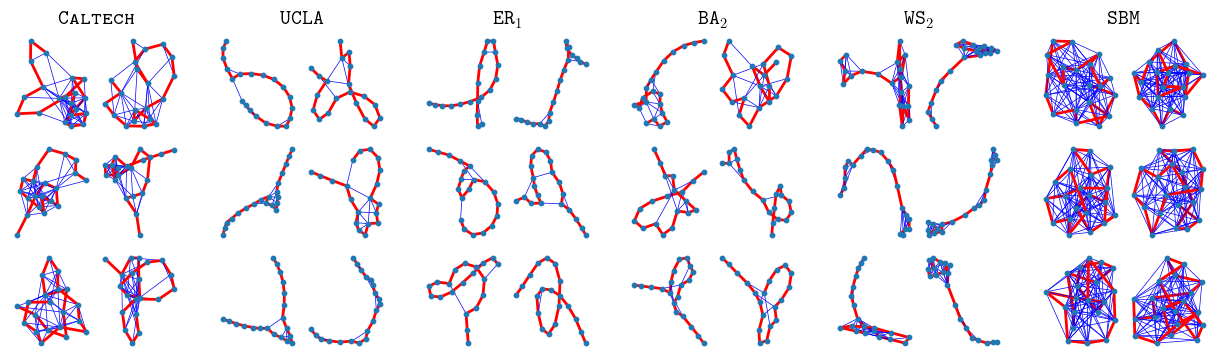

In [6]:
motif_sample_display_list(list_graphs=graph_list, k=20, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          #subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex1.pdf',
                          fig_size = [15,4])

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100


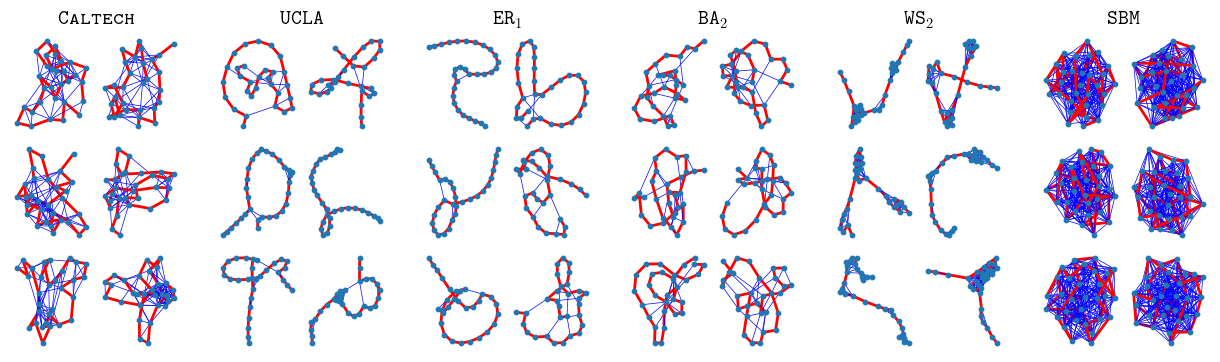

In [7]:
motif_sample_display_list(list_graphs=graph_list, k=30, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex.pdf',
                          fig_size = [15,4])

# Learn Latent motifs from networks 

In [23]:
G = graph_list[0] # Network 
k = 20 # Size of latent motif
from utils.ndl import Network_Reconstructor

reconstructor = Network_Reconstructor(G=G,  # networkx simple graph
                                      n_components=25,  # num of dictionaries
                                      MCMC_iterations=20,
                                      # MCMC steps (macro, grow with size of ntwk)
                                      k1=0, k2=k - 1,  # left and right arm lengths
                                      # keep false to use Pivot chain for recons.
                                      omit_folded_edges=True)

n_components 25
sample_size 1000


In [24]:
reconstructor.train_dict()

training dictionaries from patches...
skip_folded_hom= False
W.shape (400, 25)


  0%|                                                    | 0/20 [00:00<?, ?it/s]

homomorphism resampled


100%|███████████████████████████████████████████| 20/20 [00:30<00:00,  1.50s/it]

!!!number of distinct nodes in homomorhpisms : avg 19.05 std 1.071
!!! saved


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11173501, 0.11884925, 0.11321327, ..., 0.11480396, 0.11147036,
        0.0956999 ],
       [0.04762948, 0.01410749, 0.02641548, ..., 0.09793489, 0.05948615,
        0.01630941],
       ...,
       [0.08759712, 0.03136319, 0.03549944, ..., 0.03267368, 0.02585969,
        0.04159551],
       [0.11173501, 0.11884925, 0.11321327, ..., 0.11480396, 0.11147036,
        0.0956999 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
W = reconstructor.W # network dictionary
W.shape

(400, 25)

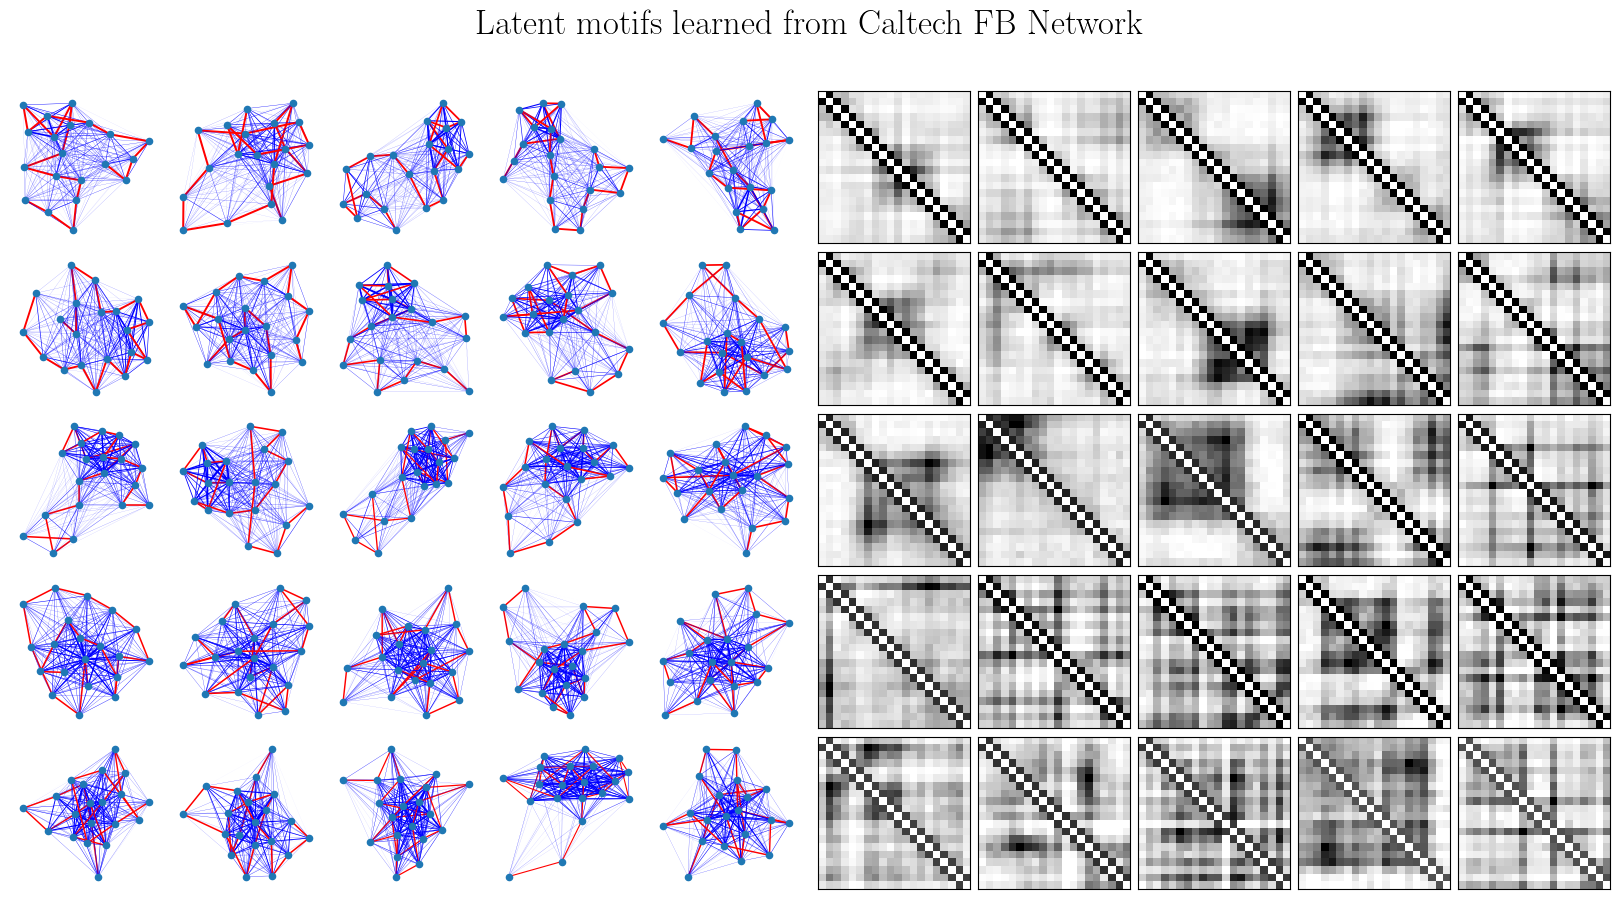

In [26]:
from helper_functions.helper_functions import display_dict_and_graph

display_dict_and_graph(title="Latent motifs learned from Caltech FB Network",
                         save_path=None,
                         grid_shape=None,
                         fig_size=[20,10],
                         W = reconstructor.W,
                         At = reconstructor.At,
                         plot_graph_only=False,
                         show_importance=False)

# Reconstruct a network using learned latent motifs



In [34]:
G1 = graph_list[0] # network to be reconstructed
W = reconstructor.W # Network dictionary to be used for reconstruction

reconstructor1 = Network_Reconstructor(G=G1,  #  simple graph
                                  n_components=W.shape[1],  # num of dictionaries
                                  MCMC_iterations=200,  # MCMC steps (macro, grow with size of ntwk)
                                  k2=k-1)  # left and right arm lengths
                                      
                                  

n_components 25
sample_size 1000


In [57]:
G_recons = reconstructor.reconstruct_network(W = W,
                                 recons_iter=10000) # rank-k mesoscale reconstruction of G

reconstructing given network...
!!! sampling alg pivot


  0%|                                                 | 0/10000 [00:00<?, ?it/s]

# edges of original ntwk= 33312
# edges of reconstructed ntwk= 38
Jaccard reconstruction accuracy= 0.0011407300672430355


  0%|                                      | 13/10000 [00:08<1:22:21,  2.02it/s]

memory use: 1.97015380859375


100%|████████████████████████████████████| 10000/10000 [01:38<00:00, 101.38it/s]


Reconstructed in 99.19 seconds
Number of edges in the baseline recons. :  33300


In [58]:
G_recons_simple = G_recons.threshold2simple(0.4)
nc = W.shape[1]
recons_metrics = reconstructor1.compute_recons_accuracy(G_recons_simple, output_full_metrics=True)
print('nc = {}, recons_accuracy={}'.format(nc,  recons_metrics.get("Jaccard_recons_accuracy")))

# edges of original ntwk= 33312
# edges of reconstructed ntwk= 30412
Jaccard reconstruction accuracy= 0.9010739856801909
nc = 25, recons_accuracy=0.9010739856801909
